In [ ]:
!pip install spotipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.5/261.5 kB 17.1 MB/s eta 0:00:00


In [ ]:
client_id = "a7990b4f18694b04b3362a2feace6942"
client_secret = "a5f181c64dc5494cabc8a4c7ea4d64cc"

In [ ]:
import requests
import base64

def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = {
        'Authorization': f'Basic {base64.b64encode((client_id + ":" + client_secret).encode()).decode()}',
        'Content-Type': 'application/x-www-form-urlencoded'
    }
    auth_data = {
        'grant_type': 'client_credentials'
    }
    auth_response = requests.post(auth_url, data=auth_data, headers=auth_header)
    auth_response_data = auth_response.json()

    if 'access_token' in auth_response_data:
        return auth_response_data['access_token']
    else:
        print("Failed to get access token:", auth_response_data)
        return None

In [ ]:
def get_genres(access_token, limit=50, offset=0):

    genres_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {
        'Authorization': f'Bearer {access_token}'
          }
    params = {
        'limit': limit,
        'offset': offset
        }

    response = requests.get(genres_url, headens=headers, params=params)
    genres_data = response.json()
    genres = [(category['id'], category['name']) for category in genres_data['categories']['items']]
    return genres

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
access_token = get_access_token(client_id, client_secret)
def get_artist_genre(artist_id):
  artist = sp.artist(artist_id)
  return artist['genres']

In [ ]:
import pandas as pd
import time

def create_dataframe(query_list, limit=50):

    data = {
        'track_id': [],
        'track_name': [],
        'track_artist': [],
        'track_popularity': [],
        'release_year': [],
        'genre': []
    }

    for query in query_list:

        search_results = sp.search(query, limit=limit, type='track')
        tracks = search_results['tracks']['items']

        for track in tracks:
          data['track_id'].append (track['id'])
          data['track_name'].append (track['name'])
          data['track_artist'].append (track['artists'][0]['name'])
          data['track_popularity'].append(track['popularity'])
          data['release_year'].append(track['album']['release_date'][ :4])
          data['genre'].append(query)

        time.sleep(2)

    df = pd. DataFrame (data)
    return df

genres = ['Top Lists', 'Hip-Hop','Pop', 'Country', 'Latin', 'Rock', 'Summer','Workout','R&B','Dance/Electronic','Netflix','Indie', 'Mood',
          'Christian & Gospel','Chill', 'Gaming', 'Kids & Family', 'Party', 'Fresh Finds','Jazz', 'Focus', 'Romance','Folk & Acoustic', 'K-Pop',
          'Sports', 'Ambient','Alternative','Classical', 'Soul', 'Spotify Singles','Punk','Pop Culture','Blues', 'Desi', 'Arab', 'RADAR',
          'Anime','Tastemakers','Student','In The Car','edm','rap']

df = create_dataframe(genres,limit=50)

In [ ]:
import pandas as pd
df = pd.read_csv("music_data.csv")

In [ ]:
df

track_artist          track_album_id      track_album_name  \
0             Dead Prez  7gXuElmegVReY7imkb5bf8        Let's Get Free   
1     Naughty By Nature  4OEP9VlZWOCt1QcOzX0oXF        19 Naughty III   
2     Naughty By Nature  6smksVgwxaPFGdSsIloCjo           Anthem Inc.   
3        Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
4        Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
...                 ...                     ...                   ...   
6479         Kanye West  7gsWAHLeT0w7es6FofOXk1     The Life Of Pablo   
6480         Kanye West  185Tm1g5U7eMOrm3m9SQUh             I Love It   
6481         Kanye West  3ff2p3LnR6V7m6BinwhNaQ   The College Dropout   
6482         Kanye West  0FgZKfoU2Br5sHOfvZKTI9         JESUS IS KING   
6483         Kanye West  7D2NdGvBHIavgLhmcwhluK                Yeezus   

                                          playlist_name  \
0                              90s Hiphop / Gangsta Rap   
1                      90's Hip Hop Ultimate Collection   
2     Back in the day - R&B, New Jack Swing, Swingbe...   
3                        Dr. Q's Prescription Playlist💊   
4                    90s-2000s Southern Hip Hop / Crunk   
...                                                 ...   
6479                               Feeling Accomplished   
6480                                            Hip pop   
6481                              90s/00s Hip Hop & RnB   
6482              Latest Hits 2020 - Pop, Hip Hop & RnB   
6483                                        Locker Room   

                 playlist_id playlist_subgenre  danceability  energy  key  \
0     5yGuoOwRQF3o8NVRRlvCj7      gangster rap         0.725   0.737    4   
1     4IG024zoaGMurhTFBkMAv9  southern hip hop         0.862   0.642    6   
2     3a9y4eeCJRmG9p4YKfqYIx    new jack swing         0.776   0.968    4   
3     6jAPdgY9XmxC9cgkXAVmVv     post-teen pop         0.788   0.798    8   
4     5wsWBmQgDtKa8CEg7wTEMi  southern hip hop         0.788   0.798    8   
...                      ...               ...           ...     ...  ...   
6479  37i9dQZF1DWTDafB3skWPN           hip pop         0.724   0.573    7   
6480  1Sc7bobknESH7SXQcnmoX5           hip pop         0.901   0.522    2   
6481  0Ar0Ng9DlAWZtSPBvOQgOa           hip pop         0.643   0.717    8   
6482  7FqZlaYKkQmVnguJbHuj2a           hip pop         0.529   0.900    1   
6483  37i9dQZF1DX8SaiEt4OVJw          big room         0.766   0.821    1   

      loudness  ...  instrumentalness  liveness  valence    tempo  \
0       -7.453  ...          0.004170    0.1090    0.219   77.161   
1      -13.652  ...          0.000000    0.2720    0.765   99.201   
2       -4.250  ...          0.000000    0.2040    0.667   97.765   
3       -4.680  ...          0.000000    0.3000    0.836  143.051   
4       -4.680  ...          0.000000    0.3000    0.836  143.051   
...        ...  ...               ...       ...      ...      ...   
6479    -4.113  ...          0.000000    0.5380    0.438  113.088   
6480    -8.304  ...          0.000000    0.2590    0.329  104.053   
6481    -4.876  ...          0.000000    0.1520    0.460   90.893   
6482    -3.503  ...          0.000012    0.0426    0.434  180.291   
6483    -6.124  ...          0.000000    0.1680    0.299  130.073   

      duration_ms                track_id             track_name  \
0          214067  2HoDr1yVksl19omOhc1zWy                Hip-Hop   
1          267267  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray   
2          250173  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray   
3          303053  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main   
4          303053  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main   
...           ...                     ...                    ...   
6479       135920  7rbECVPkY5UODxoOUVKZnA               I Wonder   
6480       127947  7rbECVPkY5UODxoOUVKZnA               I Wonder   
6481       223507  7rbECVPkY5UODxoOUVKZnA               I W

In [ ]:
df["genre"].value_counts()

genre
Party               660
Summer              610
Workout             567
Spotify Singles     551
Desi                506
Pop                 494
Rock                472
Jazz                285
R&B                 269
Punk                267
Anime               233
RADAR               145
Mood                139
Romance             132
Soul                131
K-Pop               125
In The Car          123
Chill               114
Hip-Hop              92
Country              91
Focus                90
Arab                 78
Netflix              72
Blues                47
Latin                42
Tastemakers          33
Sports               26
Indie                21
Kids & Family        18
Dance/Electronic     15
Classical            13
Gaming               12
Alternative           8
Student               2
Folk & Acoustic       1
Name: count, dtype: int64

In [ ]:
df.to_csv("spotify_data.csv", index=False)

In [ ]:
import pandas as pd

In [ ]:
df1 = pd.read_csv("spotify_data.csv")

In [ ]:
df1.head()

track_id                   track_name  \
0  6zavXfYKs1cNKFStNX8Jft                Top Ten Lists   
1  3burvexf0kalLneXkfJeEC       Songs Of Top Hits List   
2  1AD41gkaiTRzj3Wrue1o1V  Top Ten Lists Of Everything   
3  23yn3HhOF4K5NLre3prCYX                Top Hits List   
4  7ALMJGmqkXNUbfbW4bOAZL                Top Ten Lists   

                    track_artist  track_popularity  release_year      genre  
0             Foamy The Squirrel                 0          2021  Top Lists  
1                Todays Top Hits                 9          2023  Top Lists  
2              The Dyslexic Carp                 0          2024  Top Lists  
3  Todays Top Hits Instrumentals                11          2023  Top Lists  
4              The Dyslexic Carp                 0          2024  Top Lists

In [ ]:
df1.drop_duplicates(subset=['track_artist','track_name'], inplace=True)

In [ ]:
df2 = pd.read_csv("spotify_songs.csv")

In [ ]:
df1.head()

track_id                   track_name  \
0  6zavXfYKs1cNKFStNX8Jft                Top Ten Lists   
1  3burvexf0kalLneXkfJeEC       Songs Of Top Hits List   
2  1AD41gkaiTRzj3Wrue1o1V  Top Ten Lists Of Everything   
3  23yn3HhOF4K5NLre3prCYX                Top Hits List   
4  7ALMJGmqkXNUbfbW4bOAZL                Top Ten Lists   

                    track_artist  track_popularity  release_year      genre  
0             Foamy The Squirrel                 0          2021  Top Lists  
1                Todays Top Hits                 9          2023  Top Lists  
2              The Dyslexic Carp                 0          2024  Top Lists  
3  Todays Top Hits Instrumentals                11          2023  Top Lists  
4              The Dyslexic Carp                 0          2024  Top Lists

In [ ]:
df2.head()

track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [ ]:
df1.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'release_year', 'genre'],
      dtype='object')

In [ ]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
df2.rename(columns={"track_album_release_date":"release_year","playlist_genre":"genre"}, inplace=True)

In [ ]:
df2.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'release_year', 'playlist_name',
       'playlist_id', 'genre', 'playlist_subgenre', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [ ]:
df2['genre'].value_counts()

genre
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: count, dtype: int64

In [ ]:
# Merge the two database
df = pd.merge(df1, df2, on="track_artist",how="inner")

In [ ]:
# Drop duplicate columns that appear due to merging
for col in df1.columns:
    if col in df2.columns and col != "track_artist":
        df[col] = df[col + "_x"]
        df.drop(columns=[col + "_x", col + "_y"], inplace=True)


In [ ]:
df

track_artist          track_album_id      track_album_name  \
0             Dead Prez  7gXuElmegVReY7imkb5bf8        Let's Get Free   
1     Naughty By Nature  4OEP9VlZWOCt1QcOzX0oXF        19 Naughty III   
2     Naughty By Nature  6smksVgwxaPFGdSsIloCjo           Anthem Inc.   
3        Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
4        Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
...                 ...                     ...                   ...   
6479         Kanye West  7gsWAHLeT0w7es6FofOXk1     The Life Of Pablo   
6480         Kanye West  185Tm1g5U7eMOrm3m9SQUh             I Love It   
6481         Kanye West  3ff2p3LnR6V7m6BinwhNaQ   The College Dropout   
6482         Kanye West  0FgZKfoU2Br5sHOfvZKTI9         JESUS IS KING   
6483         Kanye West  7D2NdGvBHIavgLhmcwhluK                Yeezus   

                                          playlist_name  \
0                              90s Hiphop / Gangsta Rap   
1                      90's Hip Hop Ultimate Collection   
2     Back in the day - R&B, New Jack Swing, Swingbe...   
3                        Dr. Q's Prescription Playlist💊   
4                    90s-2000s Southern Hip Hop / Crunk   
...                                                 ...   
6479                               Feeling Accomplished   
6480                                            Hip pop   
6481                              90s/00s Hip Hop & RnB   
6482              Latest Hits 2020 - Pop, Hip Hop & RnB   
6483                                        Locker Room   

                 playlist_id playlist_subgenre  danceability  energy  key  \
0     5yGuoOwRQF3o8NVRRlvCj7      gangster rap         0.725   0.737    4   
1     4IG024zoaGMurhTFBkMAv9  southern hip hop         0.862   0.642    6   
2     3a9y4eeCJRmG9p4YKfqYIx    new jack swing         0.776   0.968    4   
3     6jAPdgY9XmxC9cgkXAVmVv     post-teen pop         0.788   0.798    8   
4     5wsWBmQgDtKa8CEg7wTEMi  southern hip hop         0.788   0.798    8   
...                      ...               ...           ...     ...  ...   
6479  37i9dQZF1DWTDafB3skWPN           hip pop         0.724   0.573    7   
6480  1Sc7bobknESH7SXQcnmoX5           hip pop         0.901   0.522    2   
6481  0Ar0Ng9DlAWZtSPBvOQgOa           hip pop         0.643   0.717    8   
6482  7FqZlaYKkQmVnguJbHuj2a           hip pop         0.529   0.900    1   
6483  37i9dQZF1DX8SaiEt4OVJw          big room         0.766   0.821    1   

      loudness  ...  instrumentalness  liveness  valence    tempo  \
0       -7.453  ...          0.004170    0.1090    0.219   77.161   
1      -13.652  ...          0.000000    0.2720    0.765   99.201   
2       -4.250  ...          0.000000    0.2040    0.667   97.765   
3       -4.680  ...          0.000000    0.3000    0.836  143.051   
4       -4.680  ...          0.000000    0.3000    0.836  143.051   
...        ...  ...               ...       ...      ...      ...   
6479    -4.113  ...          0.000000    0.5380    0.438  113.088   
6480    -8.304  ...          0.000000    0.2590    0.329  104.053   
6481    -4.876  ...          0.000000    0.1520    0.460   90.893   
6482    -3.503  ...          0.000012    0.0426    0.434  180.291   
6483    -6.124  ...          0.000000    0.1680    0.299  130.073   

      duration_ms                track_id             track_name  \
0          214067  2HoDr1yVksl19omOhc1zWy                Hip-Hop   
1          267267  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray   
2          250173  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray   
3          303053  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main   
4          303053  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main   
...           ...                     ...                    ...   
6479       135920  7rbECVPkY5UODxoOUVKZnA               I Wonder   
6480       127947  7rbECVPkY5UODxoOUVKZnA               I Wonder   
6481       223507  7rbECVPkY5UODxoOUVKZnA               I W

In [ ]:
df.columns

Index(['track_artist', 'track_album_id', 'track_album_name', 'playlist_name',
       'playlist_id', 'playlist_subgenre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'track_id', 'track_name',
       'track_popularity', 'release_year', 'genre'],
      dtype='object')

In [ ]:
df.size

149132

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_artist       6484 non-null   object 
 1   track_album_id     6484 non-null   object 
 2   track_album_name   6484 non-null   object 
 3   playlist_name      6484 non-null   object 
 4   playlist_id        6484 non-null   object 
 5   playlist_subgenre  6484 non-null   object 
 6   danceability       6484 non-null   float64
 7   energy             6484 non-null   float64
 8   key                6484 non-null   int64  
 9   loudness           6484 non-null   float64
 10  mode               6484 non-null   int64  
 11  speechiness        6484 non-null   float64
 12  acousticness       6484 non-null   float64
 13  instrumentalness   6484 non-null   float64
 14  liveness           6484 non-null   float64
 15  valence            6484 non-null   float64
 16  tempo              6484 

In [ ]:
df.to_csv("music_data.csv", index=False)

# Data Cleaning

In [6]:
# Remove duplicates
df = df.drop_duplicates()
df.size

149132

In [7]:
df.isnull().sum()

track_artist         0
track_album_id       0
track_album_name     0
playlist_name        0
playlist_id          0
playlist_subgenre    0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
duration_ms          0
track_id             0
track_name           0
track_popularity     0
release_year         0
genre                0
dtype: int64

In [8]:
# Fill missing numeric values with median

df.fillna(df.median(numeric_only=True), inplace=True)

# Data type identification

In [9]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['track_artist', 'track_album_id', 'track_album_name', 'playlist_name',
       'playlist_id', 'playlist_subgenre', 'track_id', 'track_name', 'genre'],
      dtype='object')

In [10]:
numerical_columns = df.select_dtypes(include=['number']).columns
numerical_columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'track_popularity', 'release_year'],
      dtype='object')

In [11]:
df.describe()

danceability       energy          key     loudness         mode  \
count   6484.000000  6484.000000  6484.000000  6484.000000  6484.000000   
mean       0.656687     0.662695     5.108112    -6.339298     0.541487   
std        0.152863     0.175067     3.640679     2.571509     0.498314   
min        0.135000     0.045500     0.000000   -23.459000     0.000000   
25%        0.555000     0.538000     1.000000    -7.621000     0.000000   
50%        0.671000     0.672000     5.000000    -5.884000     1.000000   
75%        0.771000     0.799000     8.000000    -4.559000     1.000000   
max        0.977000     0.998000    11.000000    -0.475000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  6484.000000   6484.000000       6484.000000  6484.000000  6484.000000   
mean      0.116708      0.175291          0.028306     0.189283     0.461480   
std       0.108356      0.218181          0.122330     0.146737     0.220573   
min       0.023200      0.000015          0.000000     0.009360     0.034900   
25%       0.043800      0.018900          0.000000     0.096900     0.293000   
50%       0.065300      0.080450          0.000002     0.130000     0.440000   
75%       0.153000      0.243000          0.000287     0.237000     0.619000   
max       0.918000      0.984000          0.963000     0.984000     0.979000   

             tempo   duration_ms  track_popularity  release_year  
count  6484.000000    6484.00000       6484.000000   6484.000000  
mean    121.143942  225103.89343         60.130475   2013.432603  
std      28.065763   54901.41406         18.761127     13.324169  
min      48.718000   37640.00000          0.000000   1958.000000  
25%      99.252000  191661.00000         53.000000   2012.000000  
50%     120.073000  216245.00000         63.000000   2018.000000  
75%     136.245000  248403.25000         72.000000   2022.000000  
max     207.969000  517125.00000        100.000000   2025.000000

# Data Normalization

In [12]:
from sklearn.preprocessing import StandardScaler

col = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo','duration_ms']
scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

In [13]:
df.head()

track_artist          track_album_id      track_album_name  \
0          Dead Prez  7gXuElmegVReY7imkb5bf8        Let's Get Free   
1  Naughty By Nature  4OEP9VlZWOCt1QcOzX0oXF        19 Naughty III   
2  Naughty By Nature  6smksVgwxaPFGdSsIloCjo           Anthem Inc.   
3     Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
4     Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   

                                       playlist_name             playlist_id  \
0                           90s Hiphop / Gangsta Rap  5yGuoOwRQF3o8NVRRlvCj7   
1                   90's Hip Hop Ultimate Collection  4IG024zoaGMurhTFBkMAv9   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                     Dr. Q's Prescription Playlist💊  6jAPdgY9XmxC9cgkXAVmVv   
4                 90s-2000s Southern Hip Hop / Crunk  5wsWBmQgDtKa8CEg7wTEMi   

  playlist_subgenre  danceability    energy       key  loudness  ...  \
0      gangster rap      0.446926  0.424469 -0.304393 -0.433126  ...   
1  southern hip hop      1.343223 -0.118222  0.244997 -2.843959  ...   
2    new jack swing      0.780584  1.744064 -0.304393  0.812542  ...   
3     post-teen pop      0.859092  0.772933  0.794388  0.645312  ...   
4  southern hip hop      0.859092  0.772933  0.794388  0.645312  ...   

   instrumentalness  liveness   valence     tempo  duration_ms  \
0         -0.197315 -0.547167 -1.099403 -1.567260    -0.201047   
1         -0.231406  0.563751  1.376160 -0.781901     0.768038   
2         -0.231406  0.100301  0.931828 -0.833070     0.456656   
3         -0.231406  0.754583  1.698074  0.780622     1.419911   
4         -0.231406  0.754583  1.698074  0.780622     1.419911   

                 track_id             track_name  track_popularity  \
0  2HoDr1yVksl19omOhc1zWy                Hip-Hop                57   
1  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray                66   
2  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray                66   
3  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main                35   
4  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main                35   

  release_year    genre  
0         2000  Hip-Hop  
1         1993  Hip-Hop  
2         1993  Hip-Hop  
3         2007  Hip-Hop  
4         2007  Hip-Hop  

[5 rows x 23 columns]

In [14]:
# Central Tendency

mean = df['track_popularity'].mean()
median = df['track_popularity'].median()
mode = df['track_popularity'].mode()[0]

print("For Popularity\n")
print(f"Mean: {mean}, Median: {median}, Mode: {mode}\n\n")

For Popularity

Mean: 60.130475015422576, Median: 63.0, Mode: 63




In [15]:
# Dispersion

variance = df['track_popularity'].var()
std_dev = df['track_popularity'].std()
data_range = df['track_popularity'].max() - df['track_popularity'].min()

print("For Popularity\n")
print(f"Variance: {variance}, Standard Deviation: {std_dev}, Range: {data_range}\n\n")

For Popularity

Variance: 351.9798886529382, Standard Deviation: 18.761127062437858, Range: 100




# Data Visualizations

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

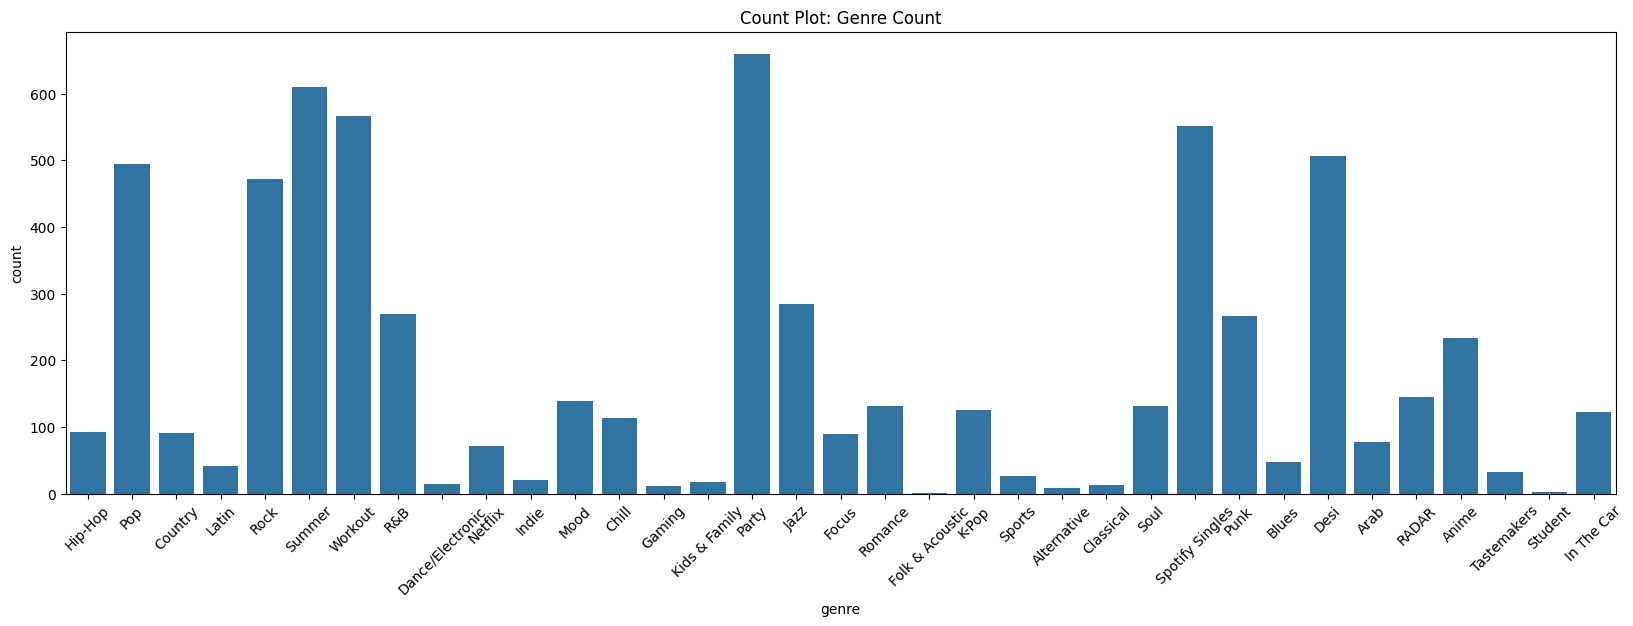

In [ ]:
#1. Count Plot

plt.figure(figsize=(20, 6))
sns.countplot(x='genre', data=df)
plt.xticks(rotation=45)
plt.title('Count Plot: Genre Count')
plt.show()

Text(0.5, 1.0, 'Top 10 Most Popular Artists')

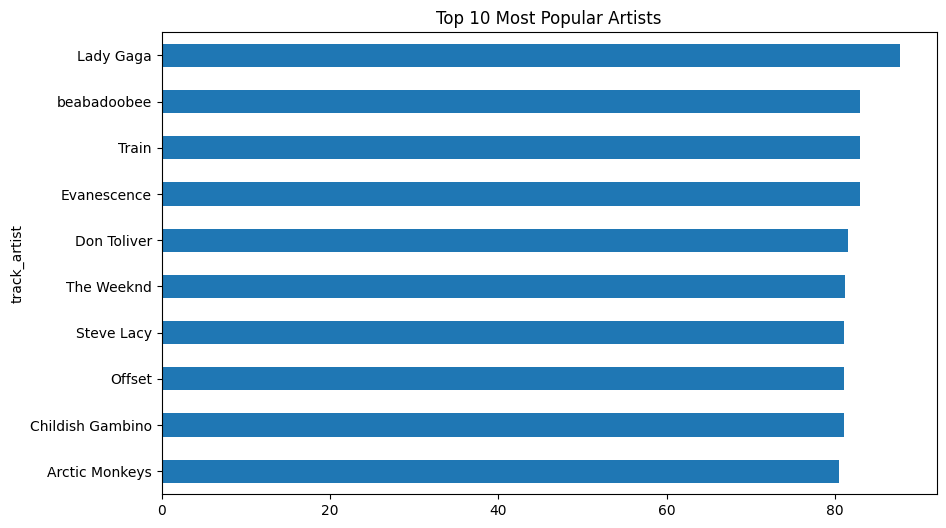

In [ ]:
#2. Bar Plot

top_artists = df.groupby('track_artist')['track_popularity'].mean().nlargest(10)
plt.figure(figsize=(10, 6))
top_artists.sort_values().plot(kind='barh')
plt.title('Top 10 Most Popular Artists')

Text(0.5, 1.0, 'Track Popularity Over the Years')

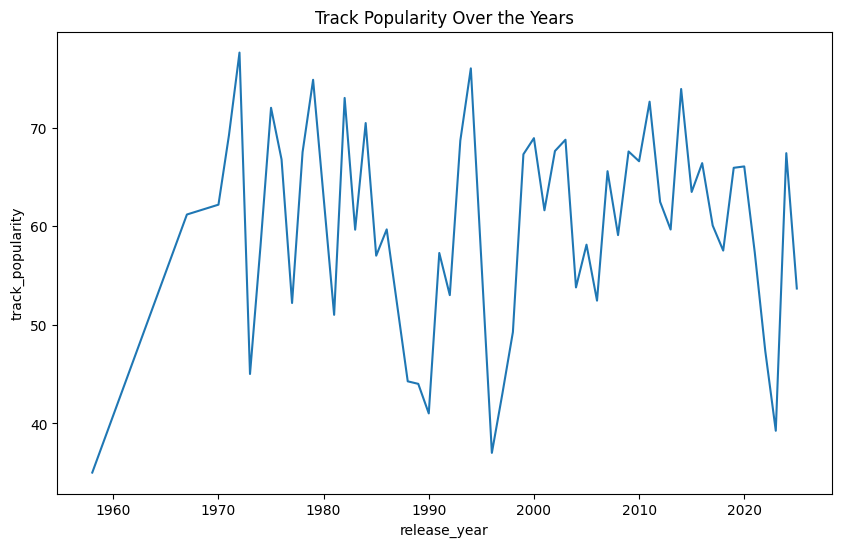

In [ ]:
#3. Line Plot

plt.figure(figsize=(10, 6))
df_yearly = df.groupby('release_year')['track_popularity'].mean().reset_index()
sns.lineplot(x='release_year', y='track_popularity', data=df_yearly, estimator='mean')
plt.title('Track Popularity Over the Years')

Text(0.5, 1.0, 'Genre Popularity')

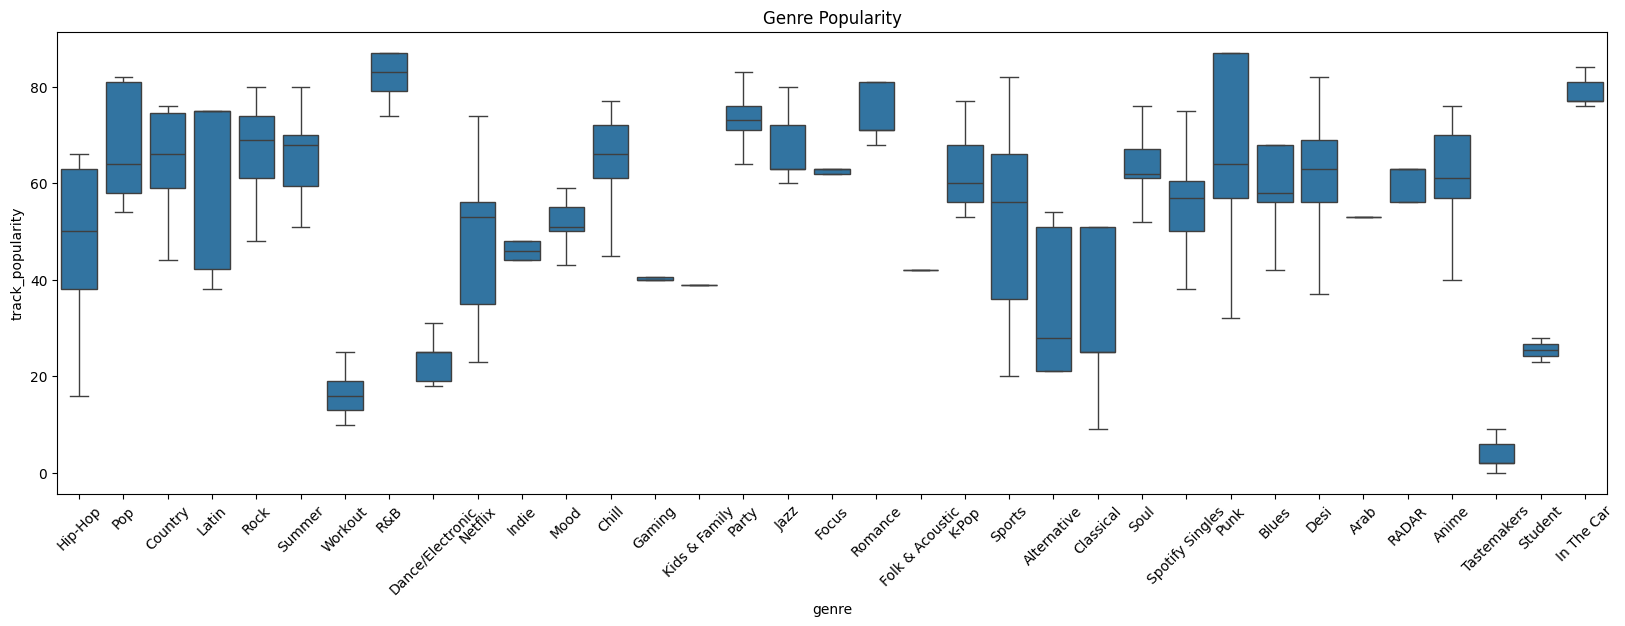

In [ ]:
# 4. Box Plot

plt.figure(figsize=(20, 6))
sns.boxplot(x='genre', y='track_popularity', data=df, showfliers=False)
plt.xticks(rotation=45)
plt.title('Genre Popularity')

Text(0.5, 1.0, 'Distribution of Danceability')

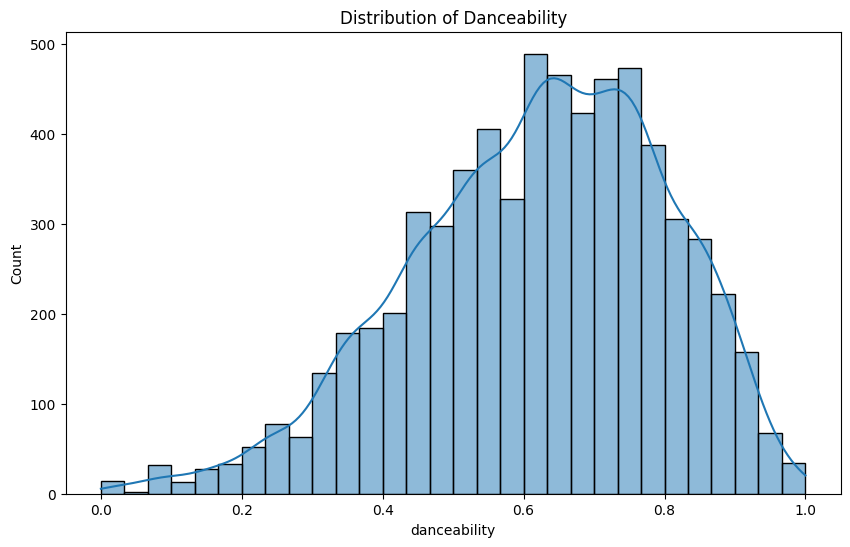

In [ ]:
# 5. Histogram

plt.figure(figsize=(10, 6))
sns.histplot(df['danceability'], bins=30,kde=True)
plt.title('Distribution of Danceability')

Text(0.5, 1.0, 'Energy vs. Danceability')

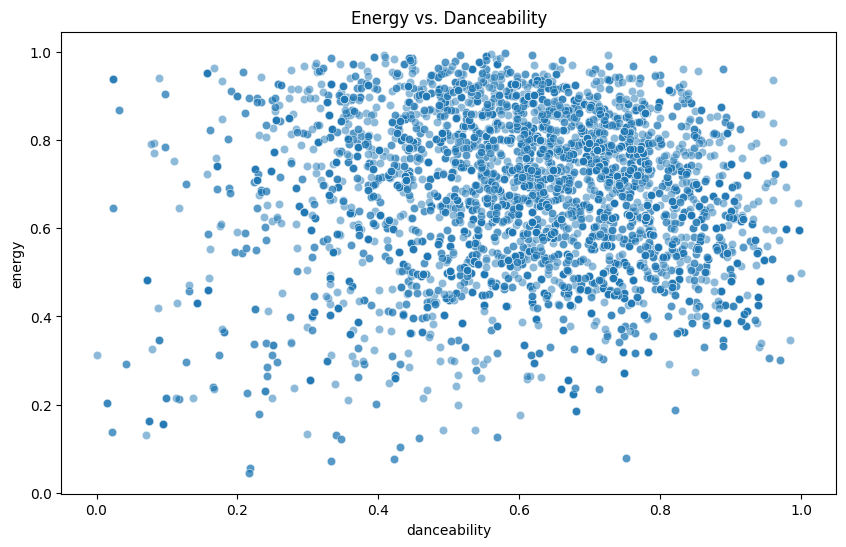

In [ ]:
# 6. Scatterplot

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['danceability'], y=df['energy'], alpha=0.5)
plt.title('Energy vs. Danceability')

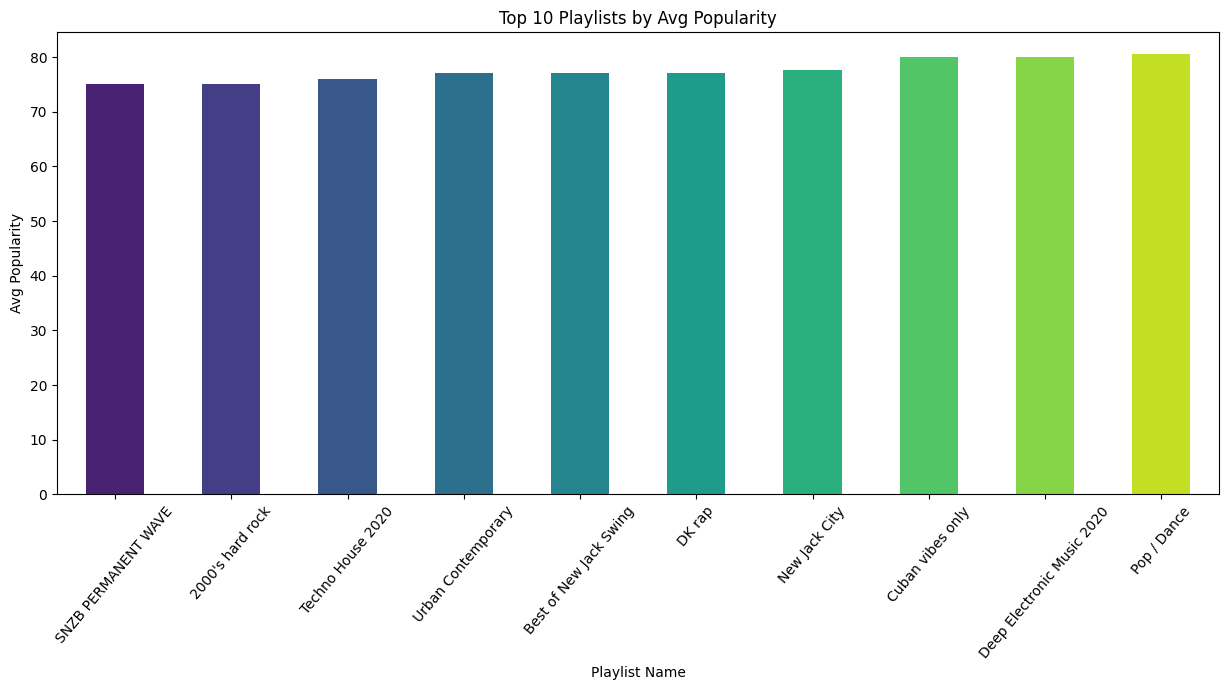

In [ ]:
#7. Bar plot

top_playlists = df.groupby('playlist_name')['track_popularity'].mean().nlargest(10)

shortened_names = {
    'Techno House 2020 👽 Best Collection 👻 Top DJ’s Electronic Music - Deep House - Trance - Tech House - Dance - Electro Pop':
    'Techno House 2020', 'Deep Electronic Music 2020 & Progressive House':'Deep Electronic Music 2020'
}
colors = sns.color_palette("viridis", len(top_playlists))

plt.figure(figsize=(15, 6))
top_playlists.sort_values().plot(kind='bar', color=colors)
plt.xticks(ticks=range(len(top_playlists)),
           labels=[shortened_names.get(name, name) for name in top_playlists.index],rotation = 50)

plt.title('Top 10 Playlists by Avg Popularity')
plt.xlabel('Playlist Name')
plt.ylabel('Avg Popularity')
plt.show()


Text(0.5, 1.0, 'Correlation Heatmap')

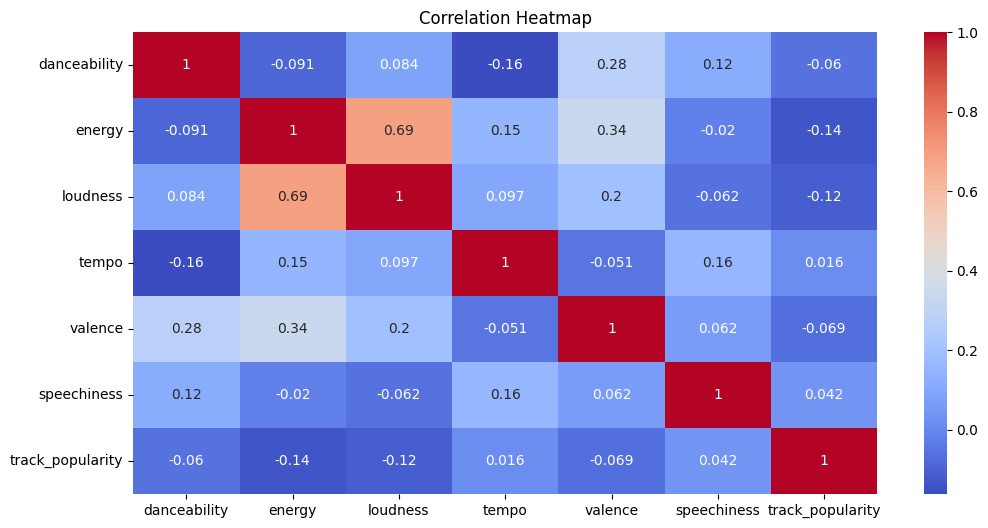

In [ ]:
# 8. Heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df[['danceability', 'energy', 'loudness', 'tempo', 'valence', 'speechiness','track_popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

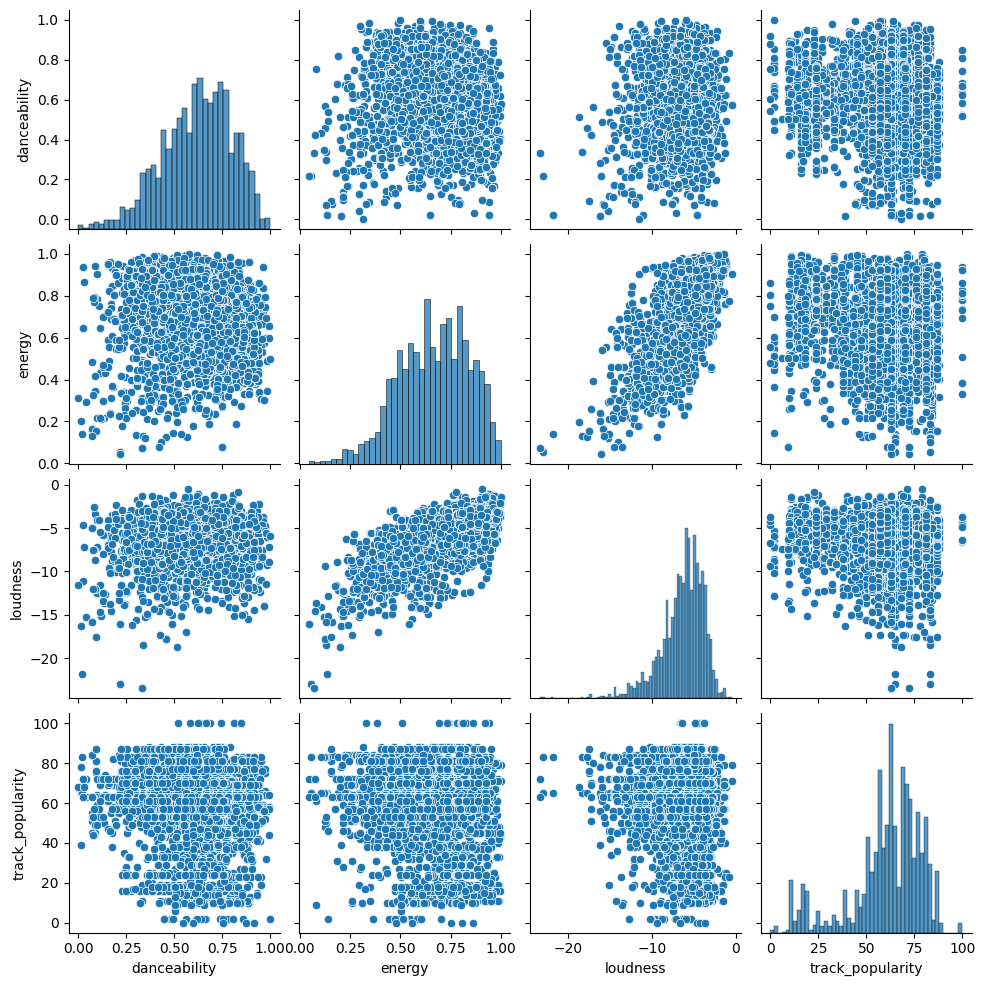

In [ ]:
# 9. Pairplot

sns.pairplot(df[['danceability', 'energy', 'loudness', 'track_popularity']])
plt.show()

In [ ]:
# 10. Strip plot

plt.figure(figsize=(10, 6))
sns.stripplot(x="genre", y="energy", data=df, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Energy Levels Across Genres")

Text(0.5, 1.0, 'Energy Levels Across Genres')

<ipython-input-71-e66b31cfbc62>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['track_popularity'], shade=True, color="red")


Text(0.5, 1.0, 'Density Plot of Track Popularity')

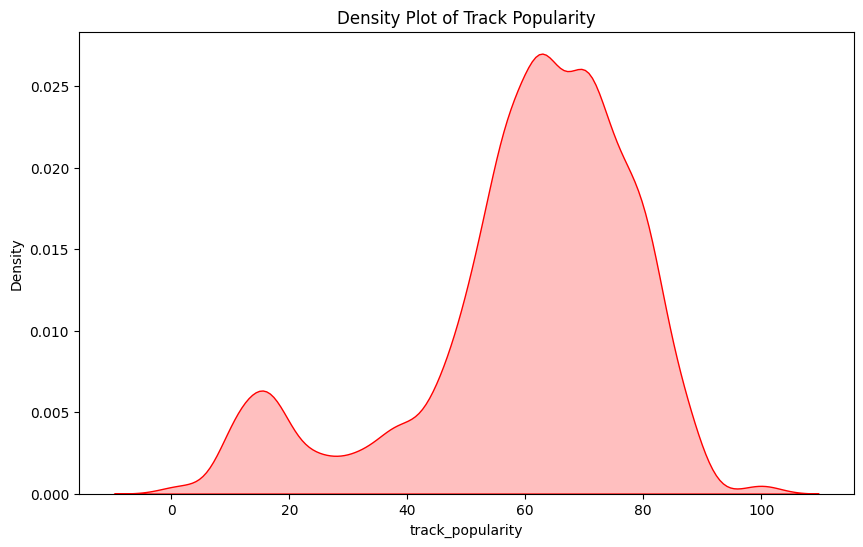

In [ ]:
# 11. Density Plot

plt.figure(figsize=(10, 6))
sns.kdeplot(df['track_popularity'], shade=True, color="red")
plt.title("Density Plot of Track Popularity")

<ipython-input-73-678db85aa02c>:4: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x="genre", y="tempo", data=df, scale="width")


Text(0.5, 1.0, 'Tempo Distribution by Genre')

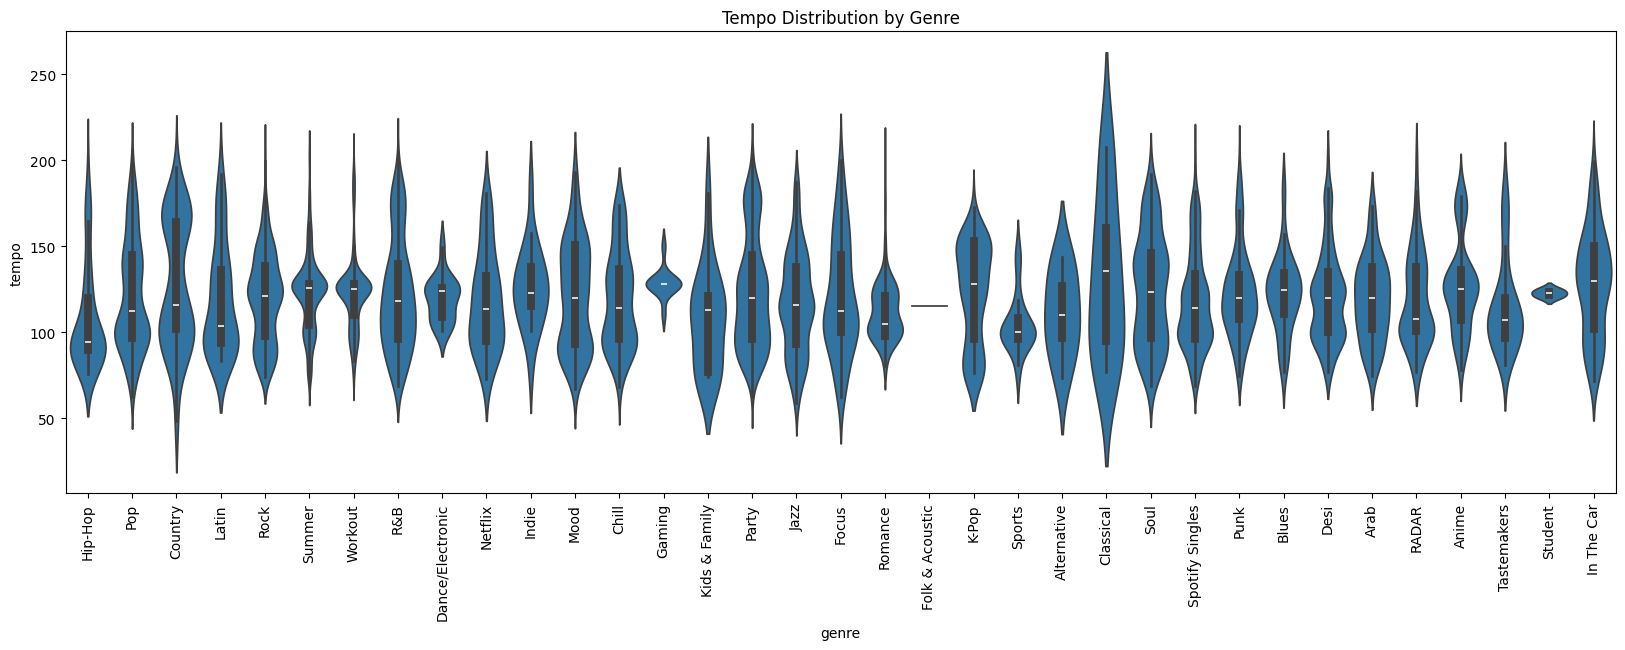

In [ ]:
# 12. Violin Plot

plt.figure(figsize=(20, 6))
sns.violinplot(x="genre", y="tempo", data=df, scale="width")
plt.xticks(rotation=90)
plt.title("Tempo Distribution by Genre")

# Data Transformation

In [16]:
df_total = df.copy()

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns

# Create a LabelEncoder instance
le = LabelEncoder()

# Convert each object column to numeric using Label Encoding
for column in categorical_cols:
    df[column] = le.fit_transform(df[column])

# Data before and after cleaning

In [18]:
print("Data before cleaning:")
df_total.head()

Data before cleaning:


track_artist          track_album_id      track_album_name  \
0          Dead Prez  7gXuElmegVReY7imkb5bf8        Let's Get Free   
1  Naughty By Nature  4OEP9VlZWOCt1QcOzX0oXF        19 Naughty III   
2  Naughty By Nature  6smksVgwxaPFGdSsIloCjo           Anthem Inc.   
3     Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   
4     Chamillionaire  31dzB4ULKZfOH71tuaBiR8  The Sound of Revenge   

                                       playlist_name             playlist_id  \
0                           90s Hiphop / Gangsta Rap  5yGuoOwRQF3o8NVRRlvCj7   
1                   90's Hip Hop Ultimate Collection  4IG024zoaGMurhTFBkMAv9   
2  Back in the day - R&B, New Jack Swing, Swingbe...  3a9y4eeCJRmG9p4YKfqYIx   
3                     Dr. Q's Prescription Playlist💊  6jAPdgY9XmxC9cgkXAVmVv   
4                 90s-2000s Southern Hip Hop / Crunk  5wsWBmQgDtKa8CEg7wTEMi   

  playlist_subgenre  danceability    energy       key  loudness  ...  \
0      gangster rap      0.446926  0.424469 -0.304393 -0.433126  ...   
1  southern hip hop      1.343223 -0.118222  0.244997 -2.843959  ...   
2    new jack swing      0.780584  1.744064 -0.304393  0.812542  ...   
3     post-teen pop      0.859092  0.772933  0.794388  0.645312  ...   
4  southern hip hop      0.859092  0.772933  0.794388  0.645312  ...   

   instrumentalness  liveness   valence     tempo  duration_ms  \
0         -0.197315 -0.547167 -1.099403 -1.567260    -0.201047   
1         -0.231406  0.563751  1.376160 -0.781901     0.768038   
2         -0.231406  0.100301  0.931828 -0.833070     0.456656   
3         -0.231406  0.754583  1.698074  0.780622     1.419911   
4         -0.231406  0.754583  1.698074  0.780622     1.419911   

                 track_id             track_name  track_popularity  \
0  2HoDr1yVksl19omOhc1zWy                Hip-Hop                57   
1  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray                66   
2  1SyQ6t9RdRBK0QUCS6a797         Hip Hop Hooray                66   
3  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main                35   
4  0VUpkue1T9WZF2LtUqJbDY  Hip Hop Police - Main                35   

  release_year    genre  
0         2000  Hip-Hop  
1         1993  Hip-Hop  
2         1993  Hip-Hop  
3         2007  Hip-Hop  
4         2007  Hip-Hop  

[5 rows x 23 columns]

In [19]:
print("Data after cleaning:")
df.head()

Data after cleaning:


track_artist  track_album_id  track_album_name  playlist_name  playlist_id  \
0            72            1789               783             23          294   
1           197            1056                17             18          230   
2           197            1651               104             35          192   
3            48             750              1419             81          325   
4            48             750              1419             24          293   

   playlist_subgenre  danceability    energy       key  loudness  ...  \
0                  6      0.446926  0.424469 -0.304393 -0.433126  ...   
1                 20      1.343223 -0.118222  0.244997 -2.843959  ...   
2                 14      0.780584  1.744064 -0.304393  0.812542  ...   
3                 17      0.859092  0.772933  0.794388  0.645312  ...   
4                 20      0.859092  0.772933  0.794388  0.645312  ...   

   instrumentalness  liveness   valence     tempo  duration_ms  track_id  \
0         -0.197315 -0.547167 -1.099403 -1.567260    -0.201047       140   
1         -0.231406  0.563751  1.376160 -0.781901     0.768038        88   
2         -0.231406  0.100301  0.931828 -0.833070     0.456656        88   
3         -0.231406  0.754583  1.698074  0.780622     1.419911        35   
4         -0.231406  0.754583  1.698074  0.780622     1.419911        35   

   track_name  track_popularity  release_year  genre  
0         157                57          2000     12  
1         148                66          1993     12  
2         148                66          1993     12  
3         153                35          2007     12  
4         153                35          2007     12  

[5 rows x 23 columns]

# ML Modelling

In [20]:
#Input

x = df.drop(['track_popularity'],axis=1)
x

track_artist  track_album_id  track_album_name  playlist_name  \
0               72            1789               783             23   
1              197            1056                17             18   
2              197            1651               104             35   
3               48             750              1419             81   
4               48             750              1419             24   
...            ...             ...               ...            ...   
6479           141            1792              1401            112   
6480           141             279               659            142   
6481           141             888              1366             25   
6482           141              72               724            166   
6483           141            1727              1588            174   

      playlist_id  playlist_subgenre  danceability    energy       key  \
0             294                  6      0.446926  0.424469 -0.304393   
1             230                 20      1.343223 -0.118222  0.244997   
2             192                 14      0.780584  1.744064 -0.304393   
3             325                 17      0.859092  0.772933  0.794388   
4             293                 20      0.859092  0.772933  0.794388   
...           ...                ...           ...       ...       ...   
6479          116                  9      0.440384 -0.512387  0.519692   
6480           53                  9      1.598373 -0.803726 -0.853784   
6481            5                  9     -0.089543  0.310218  0.794388   
6482          351                  9     -0.835366  1.355612 -1.128479   
6483          166                  1      0.715161  0.904322 -1.128479   

      loudness  ...  acousticness  instrumentalness  liveness   valence  \
0    -0.433126  ...     -0.800583         -0.197315 -0.547167 -1.099403   
1    -2.843959  ...     -0.335946         -0.231406  0.563751  1.376160   
2     0.812542  ...     -0.796746         -0.231406  0.100301  0.931828   
3     0.645312  ...      0.062837         -0.231406  0.754583  1.698074   
4     0.645312  ...      0.062837         -0.231406  0.754583  1.698074   
...        ...  ...           ...               ...       ...       ...   
6479  0.865822  ...     -0.262606         -0.231406  2.376659 -0.106457   
6480 -0.764086  ...     -0.751230         -0.231406  0.475150 -0.600663   
6481  0.569086  ...      0.039919         -0.231406 -0.254103 -0.006709   
6482  1.103055  ...     -0.802347         -0.231307 -0.999712 -0.124593   
6483  0.083731  ...     -0.798350         -0.231406 -0.145055 -0.736683   

         tempo  duration_ms  track_id  track_name  release_year  genre  
0    -1.567260    -0.201047       140         157          2000     12  
1    -0.781901     0.768038        88         148          1993     12  
2    -0.833070     0.456656        88         148          1993     12  
3     0.780622     1.419911        35         153          2007     12  
4     0.780622     1.419911        35         153          2007     12  
...        ...          ...       ...         ...           ...    ...  
6479 -0.287060    -1.624562       434         170          2007     13  
6480 -0.609008    -1.769798       434         170          2007     13  
6481 -1.077942    -0.029089       434         170          2007     13  
6482  2.107608    -2.195247       434         170          2007     13  
6483  0.318172    -0.675643       434         170          2007     13  

[6484 rows x 22 columns]

In [21]:
#Output

y = df['track_popularity']
y

0       57
1       66
2       66
3       35
4       35
        ..
6479    81
6480    81
6481    81
6482    81
6483    81
Name: track_popularity, Length: 6484, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
print('xtrain',x_train.shape)
print('xtest',x_test.shape)

xtrain (5187, 22)
xtest (1297, 22)


In [24]:
print('ytrain',y_train.shape)
print('ytest',y_test.shape)

ytrain (5187,)
ytest (1297,)


# PCA


Numeric data shape: (6484, 23)

Explained variance ratio for 2 components: 18.50221322793672
Cumulative explained variance (2D): [0.10373929 0.18502213]


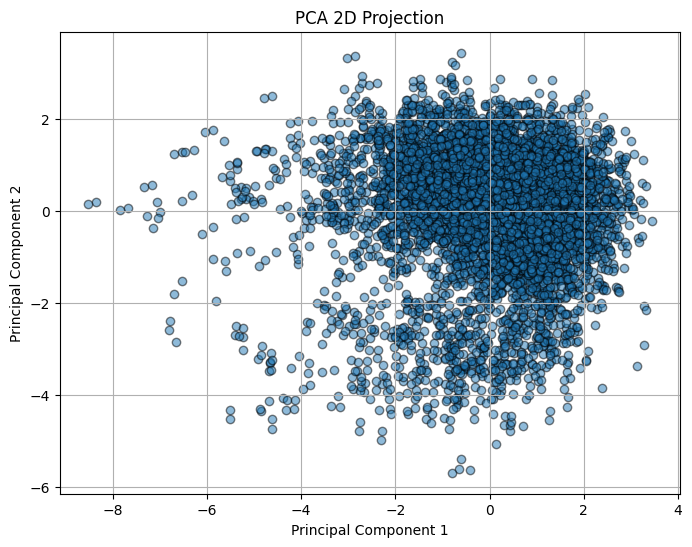

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


# Remove non-numeric columns (for example, identifiers, names, etc.)
numeric_df = df.select_dtypes(include=[np.number])
print("\nNumeric data shape:", numeric_df.shape)

# Normalize the data so each feature has mean=0 and std=1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# --- PCA with 2 Components ---
pca_2 = PCA(n_components=2)
pca_2_data = pca_2.fit_transform(scaled_data)
print("\nExplained variance ratio for 2 components:", sum(pca_2.explained_variance_ratio_)*100)
cumulative_2 = np.cumsum(pca_2.explained_variance_ratio_)
print("Cumulative explained variance (2D):", cumulative_2)

# Visualization: 2D scatter plot of the first two principal components
plt.figure(figsize=(8,6))
plt.scatter(pca_2_data[:, 0], pca_2_data[:, 1], alpha=0.5, edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA 2D Projection")
plt.grid(True)
plt.show()



Explained variance ratio for 3 components: 25.146097486057307
Cumulative explained variance (3D): [0.10373929 0.18502213 0.25146097]


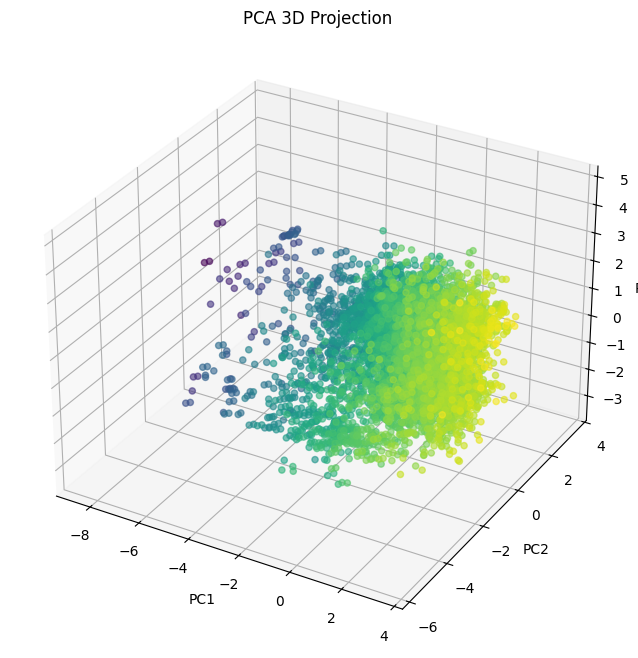

In [22]:
# --- PCA with 3 Components ---
pca_3 = PCA(n_components=3)
pca_3_data = pca_3.fit_transform(scaled_data)
print("\nExplained variance ratio for 3 components:", sum(pca_3.explained_variance_ratio_)*100)
cumulative_3 = np.cumsum(pca_3.explained_variance_ratio_)
print("Cumulative explained variance (3D):", cumulative_3)

# Visualization: 3D scatter plot of the first three principal components
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3_data[:, 0], pca_3_data[:, 1], pca_3_data[:, 2],
                     c=pca_3_data[:, 0], cmap='viridis', alpha=0.6)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA 3D Projection")
plt.show()


In [23]:
# --- Variance Retention ---
# Fit PCA without specifying n_components to see the full spectrum of variance explained.
pca_full = PCA().fit(scaled_data)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
dimensions_95 = np.argmax(cumulative_variance >= 0.95) + 1
print("\nNumber of dimensions required to retain at least 95% variance:", dimensions_95)

# --- Top Three Eigenvalues ---
eigenvalues = pca_full.explained_variance_
top_three_eigenvalues = eigenvalues[:3]
print("Top three eigenvalues:", top_three_eigenvalues)


Number of dimensions required to retain at least 95% variance: 20
Top three eigenvalues: [2.38637179 1.86979366 1.52832909]


In [28]:
pca_df = pd.DataFrame(pca_3_data, columns=[f'PC{i+1}' for i in range(3)])

print(pca_df.head())

        PC1       PC2       PC3
0  0.250009 -0.389816 -1.085443
1 -0.938601 -0.558736 -1.994705
2  2.038627 -1.051662 -1.710125
3  1.465236  0.672430 -0.974168
4  1.509505  0.806769 -0.966027


# KMeans Clustering

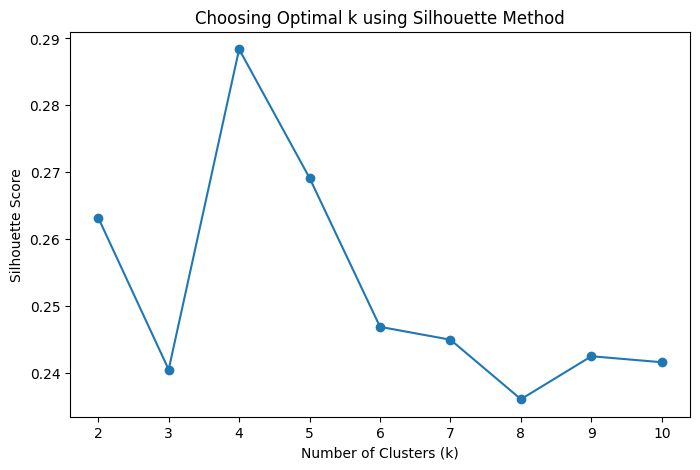

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different k values
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_3_data)
    score = silhouette_score(pca_3_data, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Choosing Optimal k using Silhouette Method")
plt.show()


Silhouette score for k=2: 0.2632
Silhouette score for k=3: 0.2404
Silhouette score for k=4: 0.2884
Silhouette score for k=5: 0.2691
Silhouette score for k=6: 0.2469
Silhouette score for k=7: 0.2449
Silhouette score for k=8: 0.2360
Silhouette score for k=9: 0.2424
Silhouette score for k=10: 0.2416
Chosen k values for KMeans clustering: [4, 5, 2]


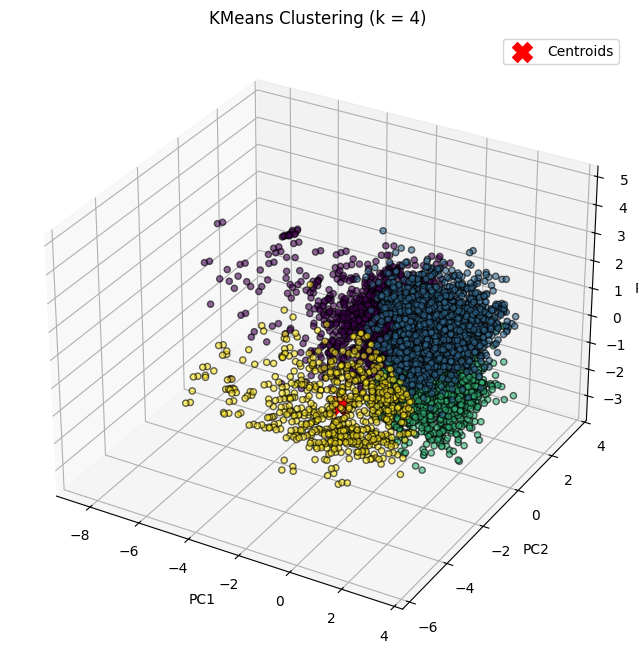

In [44]:
range_n_clusters = range(2, 11)
silhouette_scores = {}

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_3_data)
    score = silhouette_score(pca_3_data, cluster_labels)
    silhouette_scores[k] = score
    print(f"Silhouette score for k={k}: {score:.4f}")

# Choose three k-values with the highest silhouette scores
top_k = sorted(silhouette_scores, key=silhouette_scores.get, reverse=True)[:3]
print("Chosen k values for KMeans clustering:", top_k)

# Visualize KMeans results for each chosen k value
from mpl_toolkits.mplot3d import Axes3D

for k in top_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(pca_3_data)
    centroids = kmeans.cluster_centers_

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_3_data[:, 0], pca_3_data[:, 1], pca_3_data[:, 2],
                         c=clusters, cmap='viridis', alpha=0.6, edgecolor='k')
    ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2],
               marker='X', s=200, c='red', label='Centroids')
    ax.set_title(f"KMeans Clustering (k = {k})")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    plt.legend()
    plt.show()

# Hierarchical Clustering

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(pca_3_data, method='ward')
plt.figure(figsize=(18, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.show()

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Choose optimal clusters from dendrogram
h_clusters = 4
hierarchical = AgglomerativeClustering(n_clusters=h_clusters)
labels_hierarchical = hierarchical.fit_predict(pca_3_data)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_3_data[:, 0], pca_3_data[:, 1], pca_3_data[:, 2],
           c=labels_hierarchical, cmap="rainbow", alpha=0.7)

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title(f"Hierarchical Clustering (n_clusters={h_clusters})")

plt.show()


# DBSCAN Clustering

DBSCAN cluster labels: [-1  0  1  2  3  4  5  6]


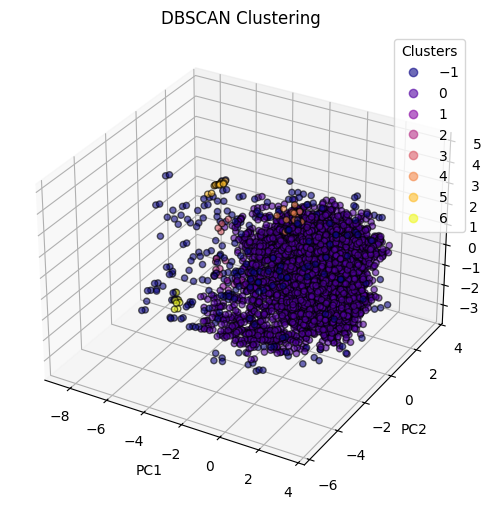

In [56]:
# --- DBSCAN Clustering ---
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_3_data)
print("DBSCAN cluster labels:", np.unique(dbscan_labels))

# Visualize DBSCAN results
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_3_data[:, 0], pca_3_data[:, 1], pca_3_data[:, 2],
                     c=dbscan_labels, cmap='plasma', alpha=0.6, edgecolor='k')
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


# ARM

In [26]:
import networkx as nx
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# --- Data Preparation for ARM ---

# Convert each row to a list (dropping any NaN values)
transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print("\nNumber of transactions:", len(transactions))
`
# One-hot encode the transaction data
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)
print("Transaction data shape after one-hot encoding:", df_trans.shape)


Number of transactions: 6484
Transaction data shape after one-hot encoding: (6484, 15525)


In [27]:
# --- Apply the Apriori Algorithm ---
# Find frequent itemsets with a minimum support threshold (e.g., 0.01)
frequent_itemsets = apriori(df_trans, min_support=0.01, use_colnames=True)
print("Number of frequent itemsets found:", frequent_itemsets.shape[0])

# Generate association rules with a minimum lift of 1
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
print("Total number of association rules generated:", len(rules))

Number of frequent itemsets found: 4907
Total number of association rules generated: 137684


In [74]:
df_trans.head()

-6.657968     -6.488405     -6.042717     -4.799771     -4.704100     \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

   -4.469590     -4.346306     -4.278636     -4.162353     -3.852006     ...  \
0         False         False         False         False         False  ...   
1         False         False         False         False         False  ...   
2         False         False         False         False         False  ...   
3         False         False         False         False         False  ...   
4         False         False         False         False         False  ...   

    2016.000000   2017.000000   2018.000000   2019.000000   2020.000000  \
0         False         False         False         False         False   
1         False         False         False         False         False   
2         False         False         False         False         False   
3         False         False         False         False         False   
4         False         False         False         False         False   

    2021.000000   2022.000000   2023.000000   2024.000000   2025.000000  
0         False         False         False         False         False  
1         False         False         False         False         False  
2         False         False         False         False         False  
3         False         False         False         False         False  
4         False         False         False         False         False  

[5 rows x 15525 columns]

In [75]:
# --- Top 15 Rules by Various Metrics ---
# Top 15 by Support
top15_support = rules.sort_values(by='support', ascending=False).head(15)
print("\nTop 15 association rules by support:")
top15_support[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Top 15 association rules by support:


antecedents             consequents   support  confidence  \
69    (-1.0867207512763457)  (-0.23140555716678532)  0.223936    0.488396   
68   (-0.23140555716678532)   (-1.0867207512763457)  0.223936    0.491371   
19     (-1.128478761221642)    (0.9201995994145759)  0.103794    0.657869   
18     (0.9201995994145759)    (-1.128478761221642)  0.103794    0.191683   
568    (0.9201995994145759)                  (80.0)  0.080814    0.149245   
569                  (80.0)    (0.9201995994145759)  0.080814    0.677878   
292  (-0.23140555716678532)                  (23.0)  0.080352    0.176311   
293                  (23.0)  (-0.23140555716678532)  0.080352    0.553666   
243                (2023.0)   (-1.0867207512763457)  0.079272    0.599068   
242   (-1.0867207512763457)                (2023.0)  0.079272    0.172889   
107                  (23.0)   (-1.0867207512763457)  0.078809    0.543039   
106   (-1.0867207512763457)                  (23.0)  0.078809    0.171880   
464     (0.519692494046097)    (0.9201995994145759)  0.077884    0.715297   
465    (0.9201995994145759)     (0.519692494046097)  0.077884    0.143834   
103   (-1.0867207512763457)                  (21.0)  0.075571    0.164817   

         lift  
69   1.071661  
68   1.071661  
19   1.214931  
18   1.214931  
568  1.251884  
569  1.251884  
292  1.214881  
293  1.214881  
243  1.306544  
242  1.306544  
107  1.184348  
106  1.184348  
464  1.320988  
465  1.320988  
103  1.221339

In [76]:
# Top 15 by Confidence
top15_confidence = rules.sort_values(by='confidence', ascending=False).head(15)
print("\nTop 15 association rules by confidence:")
top15_confidence[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Top 15 association rules by confidence:


antecedents      consequents  \
127489  (0.9201995994145759, 0.0, 15.0, 116.0, 277.0, ...    (222.0, 63.0)   
34709           (0.9201995994145759, 222.0, 277.0, 182.0)         (1978.0)   
68622                         (72.0, 1978.0, 427.0, 15.0)    (98.0, 222.0)   
68621                         (1978.0, 98.0, 222.0, 15.0)    (72.0, 427.0)   
68620                        (1978.0, 98.0, 427.0, 222.0)     (72.0, 15.0)   
68619                          (98.0, 427.0, 222.0, 15.0)   (72.0, 1978.0)   
68618                         (1978.0, 98.0, 427.0, 15.0)    (72.0, 222.0)   
68617                         (72.0, 98.0, 1978.0, 222.0)    (427.0, 15.0)   
68616                           (72.0, 98.0, 222.0, 15.0)  (1978.0, 427.0)   
68615                          (72.0, 98.0, 1978.0, 15.0)   (427.0, 222.0)   
34708          (0.9201995994145759, 1978.0, 277.0, 182.0)          (222.0)   
34710          (0.9201995994145759, 1978.0, 277.0, 222.0)          (182.0)   
68609                   (98.0, 72.0, 15.0, 1978.0, 222.0)          (427.0)   
34711          (0.9201995994145759, 1978.0, 222.0, 182.0)          (277.0)   
68614                          (72.0, 98.0, 427.0, 222.0)   (1978.0, 15.0)   

         support  confidence       lift  
127489  0.012338         1.0  46.985507  
34709   0.024676         1.0  23.750916  
68622   0.020975         1.0  46.985507  
68621   0.020975         1.0  47.676471  
68620   0.020975         1.0  46.647482  
68619   0.020975         1.0  47.676471  
68618   0.020975         1.0  46.314286  
68617   0.020975         1.0  47.676471  
68616   0.020975         1.0  47.676471  
68615   0.020975         1.0  47.676471  
34708   0.024676         1.0  19.070588  
34710   0.024676         1.0  21.979661  
68609   0.020975         1.0  45.661972  
34711   0.024676         1.0  10.594771  
68614   0.020975         1.0  23.750916

In [77]:
# Top 15 by Lift
top15_lift = rules.sort_values(by='lift', ascending=False).head(15)
print("\nTop 15 association rules by lift:")
top15_lift[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


Top 15 association rules by lift:


antecedents                  consequents   support  \
66893      (8.0, 65.0, 108.0)        (2025.0, 330.0, 45.0)  0.010179   
66904     (8.0, 330.0, 108.0)         (65.0, 45.0, 2025.0)  0.010179   
66833     (1.0, 19.0, 2023.0)         (280.0, 34.0, 310.0)  0.010179   
66834    (1.0, 310.0, 2023.0)          (280.0, 34.0, 19.0)  0.010179   
66837      (280.0, 1.0, 19.0)        (34.0, 310.0, 2023.0)  0.010179   
35167      (8.0, 330.0, 45.0)              (2025.0, 108.0)  0.010179   
66840   (34.0, 310.0, 2023.0)           (280.0, 1.0, 19.0)  0.010179   
66843     (280.0, 34.0, 19.0)         (1.0, 310.0, 2023.0)  0.010179   
66844    (280.0, 34.0, 310.0)          (1.0, 19.0, 2023.0)  0.010179   
66846   (280.0, 19.0, 2023.0)           (1.0, 34.0, 310.0)  0.010179   
66847  (280.0, 310.0, 2023.0)            (1.0, 34.0, 19.0)  0.010179   
35165     (8.0, 2025.0, 45.0)               (330.0, 108.0)  0.010179   
66852            (1.0, 310.0)  (280.0, 34.0, 19.0, 2023.0)  0.010179   
66856           (34.0, 310.0)   (280.0, 1.0, 19.0, 2023.0)  0.010179   
35163    (8.0, 2025.0, 330.0)                (108.0, 45.0)  0.010179   

       confidence       lift  
66893         1.0  98.242424  
66904         1.0  98.242424  
66833         1.0  98.242424  
66834         1.0  98.242424  
66837         1.0  98.242424  
35167         1.0  98.242424  
66840         1.0  98.242424  
66843         1.0  98.242424  
66844         1.0  98.242424  
66846         1.0  98.242424  
66847         1.0  98.242424  
35165         1.0  98.242424  
66852         1.0  98.242424  
66856         1.0  98.242424  
35163         1.0  98.242424

In [73]:
# Create a Directed Graph
G = nx.DiGraph()

# Add edges with formatted labels
for idx, row in top15_lift.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

# Draw the Network Graph
plt.figure(figsize=(22, 10))
pos = nx.spring_layout(G, seed=42)  # Ensuring consistent layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10)

# Add edge labels (lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Association Rule Network with Lift Values")
plt.show()

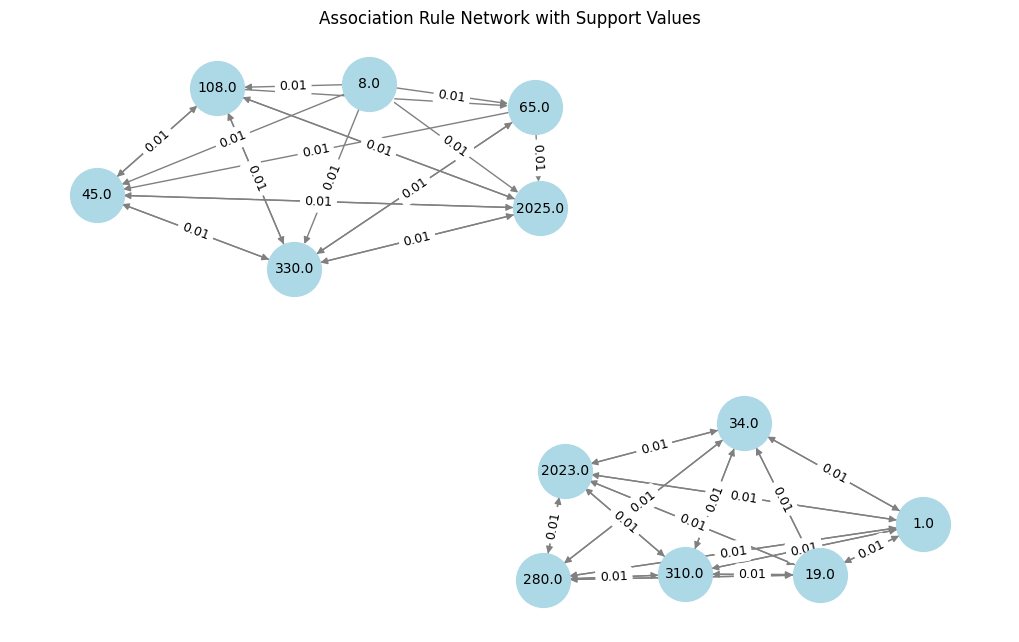

In [59]:
# Create a Directed Graph
G = nx.DiGraph()

# Add edges with formatted labels
for idx, row in top15_lift.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['support'])

# Draw the Network Graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)  # Ensuring consistent layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10)

# Add edge labels (lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Association Rule Network with Support Values")
plt.show()

In [65]:
# Create a Directed Graph
G = nx.DiGraph()

# Add edges with formatted labels
for idx, row in top15_lift.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['confidence'])

# Draw the Network Graph
plt.figure(figsize=(20,10))
pos = nx.spring_layout(G, seed=42)  # Ensuring consistent layout

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10)

# Add edge labels (lift values)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title("Association Rule Network with confidence Values")
plt.show()